In [14]:
# using python 3.11 for this 

import photutils
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from photutils.psf import fit_fwhm
from astropy.visualization import simple_norm
fn = '~/charis_mm_testing/HD35532/flat-cubes/CRSA00155552_flat_cube.fits'

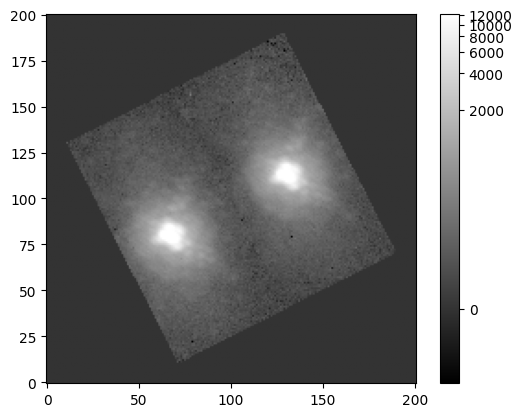

[8.81454803]


In [17]:
test_hdul = fits.open(fn)
image_data = (test_hdul[1].data)#[:,:,:99]
image_data_right = (test_hdul[1].data)[:,:,100:200]
#aperture.plot(color='red')
snorm = simple_norm(image_data, 'log', percent=99.5)
plt.imshow(image_data[12], origin='lower', cmap='gray', norm=snorm)

plt.colorbar()
plt.show()
guess = [130,125] # Star is unpol, so should be roughly the same on both sides
fwhm = fit_fwhm(image_data[12],xypos=guess,fit_shape=53)
print(fwhm)
